# Analiza podatov umetnin družine galerij Tate, ki so nastale med leti 1900-1950

In [52]:
import pandas as pd
import numpy as np
from pandas import DataFrame
pd.options.display.max_rows = 13
%matplotlib inline
import matplotlib.pyplot as plt

# Za lepše prikazovanje grafov naložimo knjižnico Seaborn
import seaborn as sns

current_palette_11 = sns.color_palette("hls", 5)
sns.set_palette(current_palette_11)

umetnine = pd.read_csv('umetnine.csv', index_col='id')

Podatki so v surovi csv datoteki za stolpca "letnica" in "lokacija" vpisani z nabori, zato jih bom najprej rastavil ter uredil.

In [53]:
df = DataFrame(data = umetnine)
letnica_razcepljena = df['letnica'].apply(eval).apply(pd.Series)
letnica_razcepljena.columns =['prefiksni komentar letnice', 'leto začetka nastajanja', 'leto zaključka nastajanja', 'dodatni komentar ob letnici']

In [54]:
lokacija_razcepljena = df['lokacija'].apply(eval).apply(pd.Series)
lokacija_razcepljena.columns =['galerija ali muzej', 'razstava']

In [55]:
letnica_razcepljena['leto začetka nastajanja'] = pd.to_numeric(letnica_razcepljena['leto začetka nastajanja'])
letnica_razcepljena['leto zaključka nastajanja'] = pd.to_numeric(letnica_razcepljena['leto zaključka nastajanja'])

In [56]:
letnice_srednja_vrednost = letnica_razcepljena[['leto začetka nastajanja', 'leto zaključka nastajanja']].mean(axis=1)
letnice_srednja_vrednost = letnice_srednja_vrednost.round(decimals=0)

In [57]:
letnice_vse = pd.concat([letnica_razcepljena, letnice_srednja_vrednost], axis=1)
letnice_vse.columns = ['prefiksni komentar letnice', 'leto začetka nastajanja', 'leto zaključka nastajanja', 'dodatni komentar ob letnici', 'srednja vrednost let nastajanja']

In [58]:
#frames = [umetnine, letnica_rascepljena, lokacija_rascepljena]
umetnine = pd.concat([umetnine, letnice_vse], axis=1)
umetnine = pd.concat([umetnine, lokacija_razcepljena], axis=1)
del umetnine['letnica']
del umetnine['lokacija']

In [59]:
umetnine = umetnine.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

Tabela podatkov sedaj izgleda tako:

In [60]:
umetnine

,umetnik,naslov,prefiksni komentar letnice,leto začetka nastajanja,leto zaključka nastajanja,dodatni komentar ob letnici,srednja vrednost let nastajanja,galerija ali muzej,razstava
id,,,,,,,,,
T07573,Marcel Duchamp,Fountain,NaN,1917.0,1917.0,", replica 1964",1917.0,Tate Modern,Level 4: Materials and Objects
T05010,Pablo Picasso,Weeping Woman,NaN,1937.0,1937.0,NaN,1937.0,NaN,NaN
T02343,Salvador Dalí,Metamorphosis of Narcissus,NaN,1937.0,1937.0,NaN,1937.0,Tate Modern,Level 2: In the Studio
T03257,Salvador Dalí,Lobster Telephone,NaN,1936.0,1936.0,NaN,1936.0,Tate Modern,Level 2: In the Studio
N04567,Duncan Grant,Bathing,NaN,1911.0,1911.0,NaN,1911.0,NaN,NaN
T00648,Piet Mondrian,"Composition with Yellow, Blue and Red",NaN,1937.0,1942.0,NaN,1940.0,Tate St Ives,Modern Art and St Ives
...,...,...,...,...,...,...,...,...,...
A01047,Sir Max Beerbohm,Blue China,NaN,1916.0,1916.0,NaN,1916.0,NaN,NaN
N03339,Henri Gaudier-Brzeska,A Wolf,NaN,1913.0,1913.0,NaN,1913.0,View by appointment,NaN


## Podatki letnic

V podatkih imamo veliko primerov umetnin, ki so nastajale tudi več let: to nam omogoča, da vsa dela predstavimo v ravnini.

Poglejmo koliko del je nastalo po srednji vrednosti leta začetka in konca nastajanja.

In [61]:
stevilo_umetnin_po_srednji_vrednost_let_nastajanja = letnice_vse.groupby('srednja vrednost let nastajanja')
st_stevilo_umetnin = stevilo_umetnin_po_srednji_vrednost_let_nastajanja.size().count()

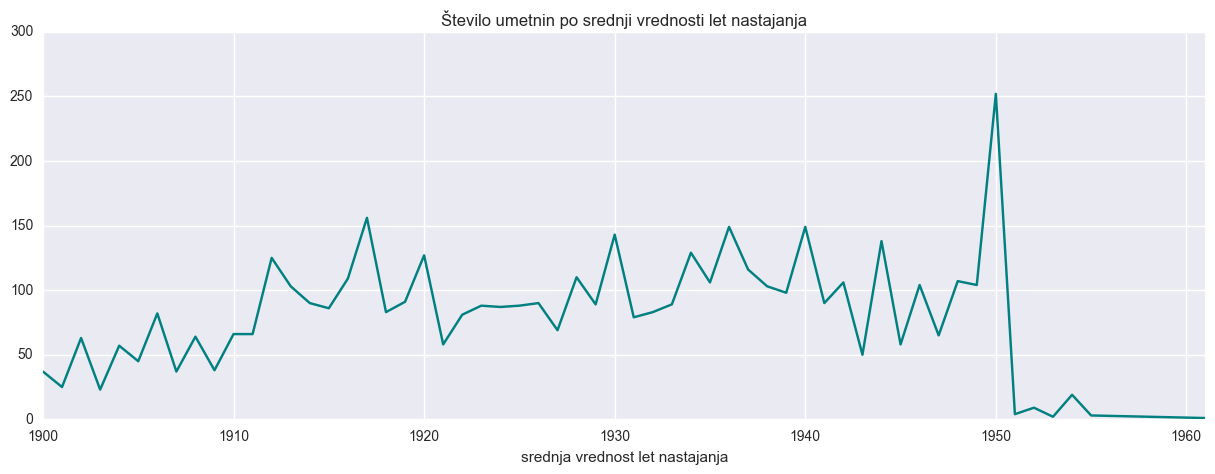

In [62]:
umetnine_na_leto = umetnine.groupby('srednja vrednost let nastajanja')
umetnine_na_leto.size().plot(figsize=(15,5), title = 'Število umetnin po srednji vrednosti let nastajanja', color='teal',  x_compat=True)

Število umetnin naraste po letu 1910. V nemirnih obdobjih stoletja je produkcija povprečno visoka. Nekoliko sumljivi so vrhovi ob polnih desetletjih. 

Z ločenima grafoma pogledamo še odstopanja za števila umetnin poletu in koncu nastajanja:

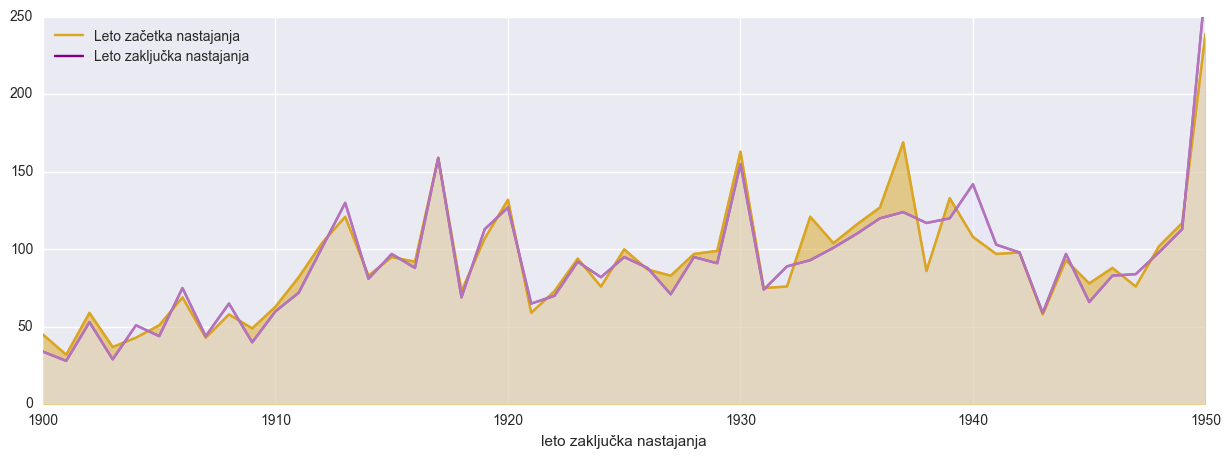

In [63]:
umetnine_zacetek = umetnine.groupby('leto začetka nastajanja')
umetnine_konec = umetnine.groupby('leto zaključka nastajanja')

umetnine_zacetek.size().plot(color='goldenrod', figsize=(15,5), label='Leto začetka nastajanja', legend=True, xlim=(1900,1950))
umetnine_zacetek.size().plot(kind='area', color='goldenrod', figsize=(15,5), stacked=False, xlim=(1900,1950))

#umetnine_na_leto.size().plot(color='teal', figsize=(15,5))

umetnine_konec.size().plot(color='purple', figsize=(15,5), label='Leto zaključka nastajanja', legend=True, xlim=(1900,1950))
umetnine_konec.size().plot(kind='area', color='lavender', figsize=(15,5), stacked=False, xlim=(1900,1950))

V tridesetih letih se pojavlja nezanemarljivo odstopanje.

V ravnini lahko na x os postavimo leto začetka, na y pa leto zaključka nastajanja.

Odstopanje lahko potemtakem prikažemo s spodnjim grafom. Opazimo, da odvisnost poteka linearno: večina del je torej zaključenih v enem letu.

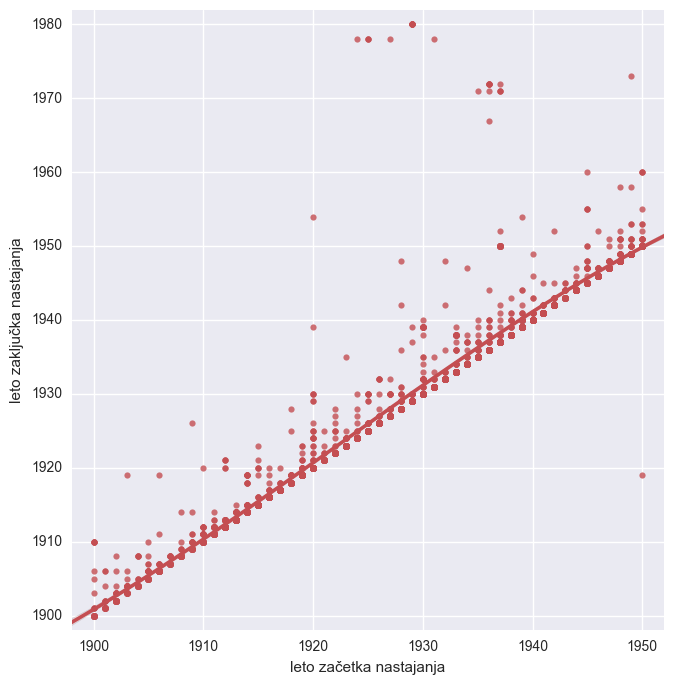

In [64]:
#umetnine.plot.scatter(x='leto začetka nastajanja', y='leto zaključka nastajanja', color='plum', figsize=(20, 10))
m = sns.FacetGrid(umetnine, size=(7), aspect=(1))
m = (m.map(sns.regplot, 'leto začetka nastajanja', 'leto zaključka nastajanja', order=3, color='r')).set(xlim=(1898, 1952), ylim=(1898, 1982))

Na spletni strani so podatki letnice podani nesistematično in s prisotnostjo dodatnih informacij; v primerih ko je datum negotov se na raznih mestih (pred oz. po letnici začetka oz. konca nastajanja) pojavljajo komentarji kot so c., ?, -s, itd. Zaradi raznovrstnosti se z njihovo sistematizacijo nisem ubadal. Prepričajmo se še, da jih v obravnavi lahko upravičeno zanemarimo.

Začnimo s prefiknimi komentarji.

In [65]:
umetnine['prefiksni komentar letnice'].count()

1316

Približno četrtina podatkov (4706) ima torej frefiksni komentar. Kolikšen upliv pa imajo na natančnost letnce? Preštejmo posamezne oblike komentarjev:

In [66]:
umetnine['prefiksni komentar letnice'].value_counts()

c.                 1146
exhibited            94
20th Century         17
?c.                  14
?                    13
after                10
                   ... 
c.1945–c.1960–4       1
ci.                   1
Late                  1
After                 1
1921–c.23             1
before                1
Name: prefiksni komentar letnice, dtype: int64

Skoraj vsi nakazujejo na splošen približek c. (circa), ki ga lahko interpretiramo kot plus-minus napako: v splošnem gledano nam torej na podatke ne vplivajo. Poglejmo za katera leta jih je je največ:

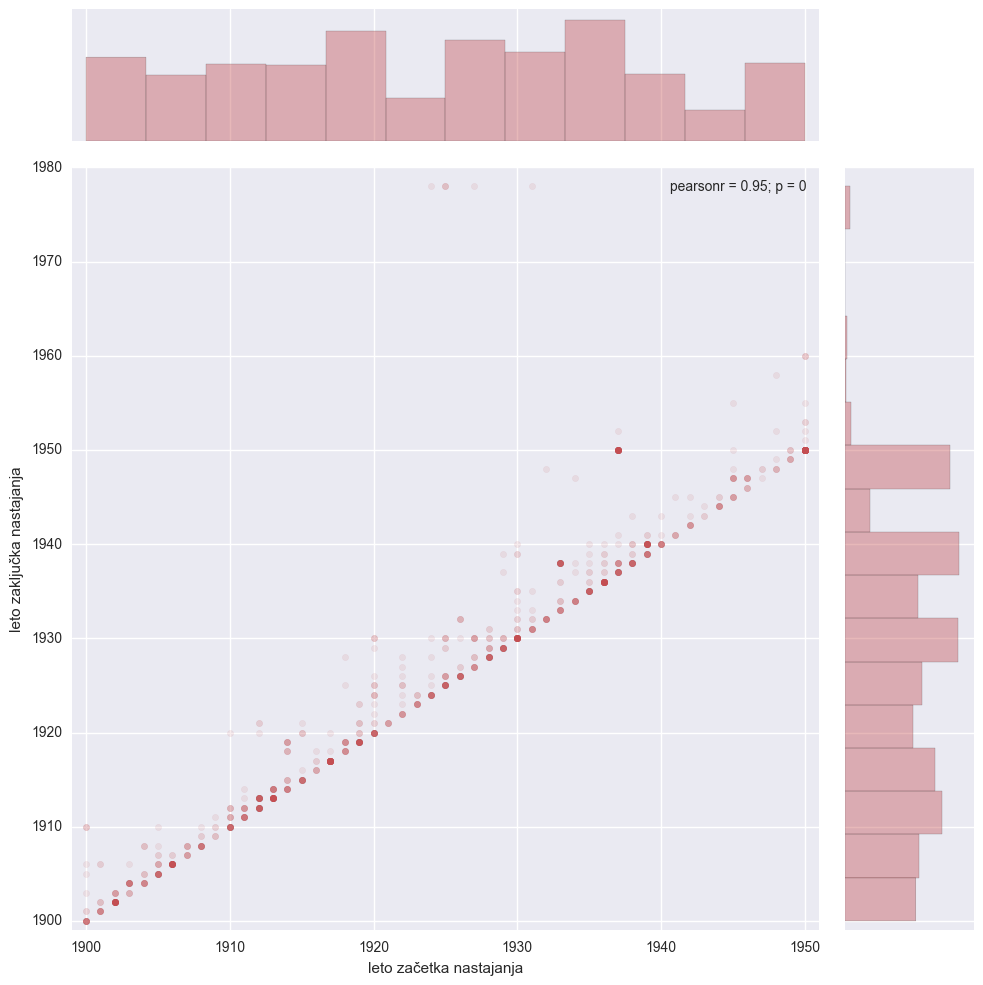

In [67]:
umetnine_c = umetnine[(umetnine['prefiksni komentar letnice'] == 'c.')]
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot('leto začetka nastajanja', 'leto zaključka nastajanja', 
                  data=umetnine_c, kind="scatter" , color="r", size=10, alpha=0.1, xlim=(1899,1951), ylim=(1899,1980))

Dva višja vrhova za leta začetka nastajanja grobo sovpadata z obdobjema svetovnih vonj - pri tem je pa treba upoštevati, da sta bila, kot lahko odčitamo iz že podanih grafov, ta dva obdobja med bolj aktivnimi. Podobno bi lahko sklepali za leta zaključka nastajanja.

Drugi in tretji najpogostejši prefiksni komentar sta exhibited in 20th Century. Preostanek ima podobno funcijo že obravnavanega c., ali se pa pojavlja posamično.
Kometar 20th Century, je bilo treba pri zajemanju podatkov obravnavati kot izjemo: umetnine s tem prefiksnim komentarjem nimajo podatka o začetku in koncu nastajanja.
Za komentar exhibited si pa poglejmo, kdaj se pogosteje pojavlja:

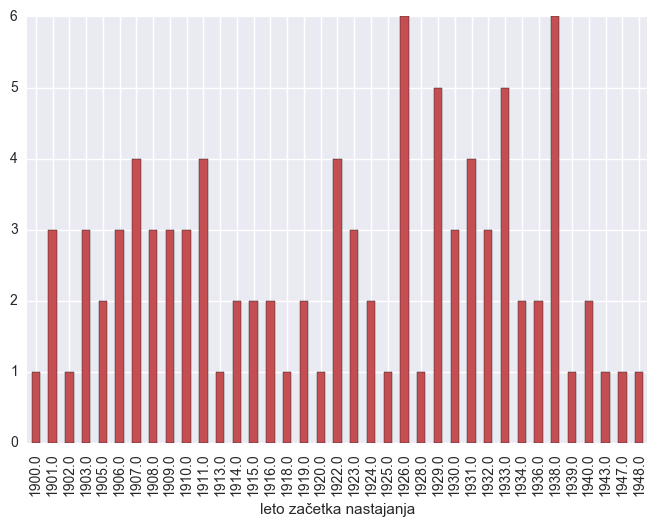

In [68]:
umetnine_exhibited = umetnine[(umetnine['prefiksni komentar letnice'] == 'exhibited ')]
umetnine_exhibited_po_letu_zacetka = umetnine_exhibited.groupby('leto začetka nastajanja').size()
umetnine_exhibited_po_letu_zacetka.plot(kind='bar', color='r')

Vzemimo kot primer leto 1938 in preverimo, če je imel kateri izmed umetnikov priložnostno razstavo.
Zgleda, da ne.

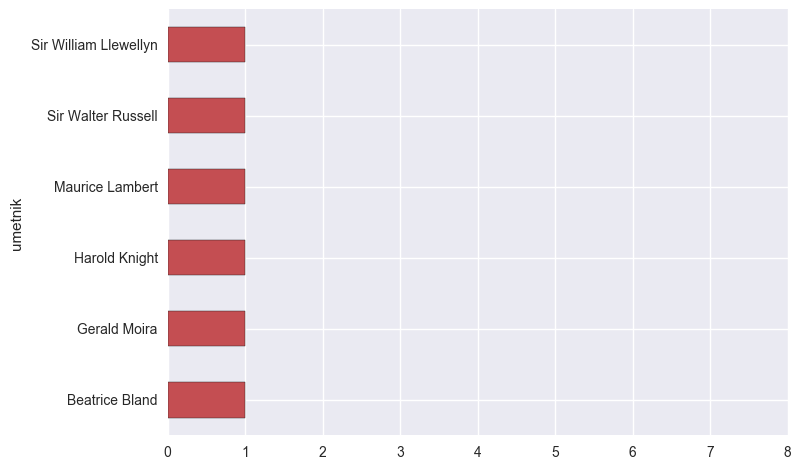

In [69]:
umetnine_exhibited_1926 = umetnine_exhibited[(umetnine_exhibited['srednja vrednost let nastajanja'] == 1938)]
umetnine_exhibited_1926_po_umetniku = umetnine_exhibited_1926.groupby('umetnik').size()
umetnine_exhibited_1926_po_umetniku.plot(kind='barh', color='r', xlim=(0, 8))

V dodatnem komentarju ob letnici so večinoma zbrane dodatne informacije. Pri tem so izjema s-ji, ki nakazujejo na približno določeno desetletje.

In [70]:
umetnine['dodatni komentar ob letnici'].value_counts().head(10)

, printed 1990      162
s                    62
, later print        35
, cast 1960s         15
, printed 1976       13
, printed later      13
, printed 1983       11
, printed 1977       10
, printed 1998        9
, published 1961      7
Name: dodatni komentar ob letnici, dtype: int64

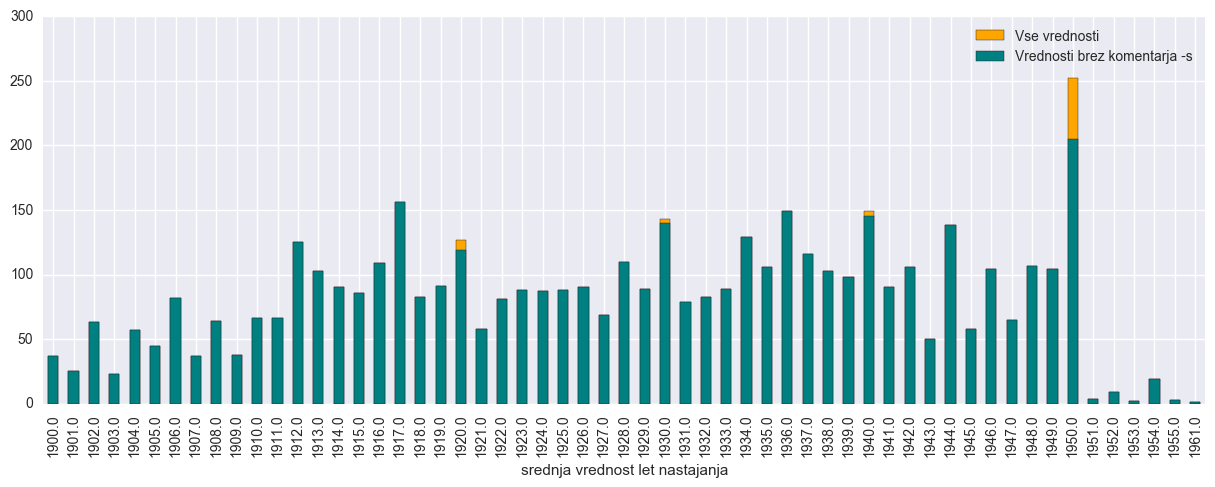

In [71]:
umetnine_brez_s = umetnine[(umetnine['dodatni komentar ob letnici'] != 's')]

umetnine_na_leto = umetnine.groupby('srednja vrednost let nastajanja')
umetnine_na_leto.size().plot(kind= 'bar', figsize=(15,5), color='orange', legend=True, label='Vse vrednosti')

umetnine_na_leto_brez_s = umetnine_brez_s.groupby('srednja vrednost let nastajanja')
umetnine_na_leto_brez_s.size().plot(kind= 'bar', figsize=(15,5), color='teal', legend=True, label='Vrednosti brez komentarja -s')

Nadpovprečen vrh števila umetnin za leto 1950 je sadaj pojasnjen!

Kot zanimivost poskusimo raziskati zakaj je bilo leta 1990 natisnjenih toliko fotografij.

In [72]:
umetnine_printed1990 = umetnine[(umetnine['dodatni komentar ob letnici'] == ', printed 1990')]
umetnine_printed1990_po_umetniku = umetnine_printed1990.groupby('umetnik').size()
umetnine_printed1990_po_umetniku

umetnik
August Sander    161
George Rodger      1
dtype: int64

Po izčrpni raziskavi na spletni strani Tate informacije o razlogu za tiskanje tako številnih fotografij Augusta Sanderja nisem našel.

Nekaj dodatnih komentarjev ob letnici nakazuje na manjše pomankljivosti zajema podatkov: če je delo nastajalo v več obdobjih, kateri so na spletni strani označeni s sosledjem letnic ločenih z vezaji, so kot letnica začetka in konca nastajanja zajeti prvi dve, ki se pojavita. Primer:

In [73]:
umetnine[(umetnine['dodatni komentar ob letnici'] == '–1936, cast 1966') ]

,umetnik,naslov,prefiksni komentar letnice,leto začetka nastajanja,leto zaključka nastajanja,dodatni komentar ob letnici,srednja vrednost let nastajanja,galerija ali muzej,razstava
id,,,,,,,,,
T01519,Alberto Giacometti,Walking Woman I,NaN,1932.0,1933.0,"–1936, cast 1966",1932.0,NaN,NaN


## Podatki umetin, ki si jih je mogoče ogledati.

V spodnjih grafih se osredotočimo le na podatke del, katerih je ogled možen.

S tortnim diagramom razberemo ostotek za posamezno galerijo oz. ogled po dogovoru.

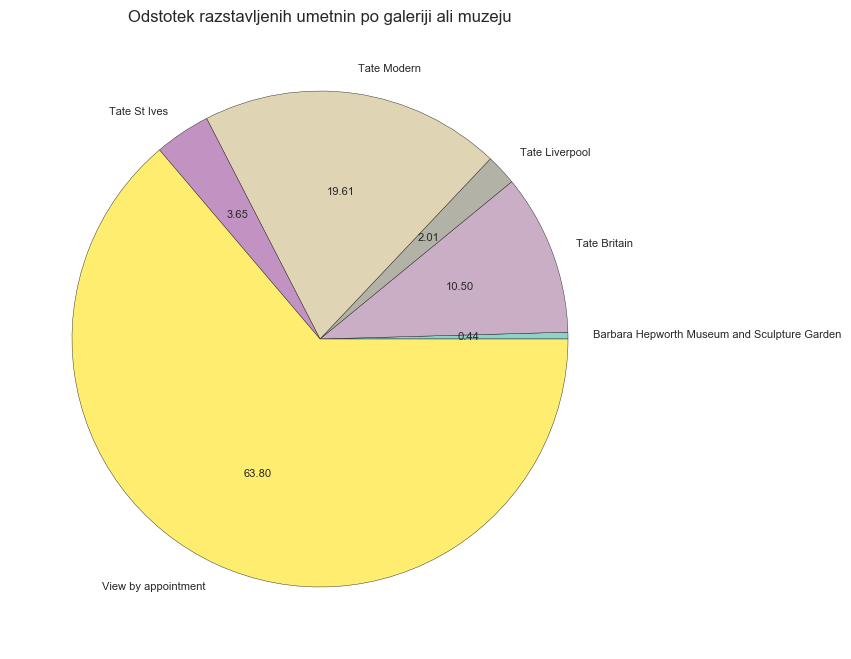

In [74]:
umetnine_po_galeriji_ali_muzeju = umetnine.groupby('galerija ali muzej')
umetnine_po_galeriji_ali_muzeju.size().plot(kind='pie', figsize=(8, 8), autopct='%.2f', fontsize=8, title = 'Odstotek razstavljenih umetnin po galeriji ali muzeju', colormap='Set3').set(ylabel='')

Kot pričakovano imata Tate Modern in Tate Britain večji delež: obe namreč pokrivata obdobje 1900-1950 v svojih stalnih zbirkah.

In [75]:
umetnine['galerija ali muzej'].value_counts()

View by appointment                             1015
Tate Modern                                      312
Tate Britain                                     167
Tate St Ives                                      58
Tate Liverpool                                    32
Barbara Hepworth Museum and Sculpture Garden       7
Name: galerija ali muzej, dtype: int64

Povprečje letnice del po posamezni galeriji:

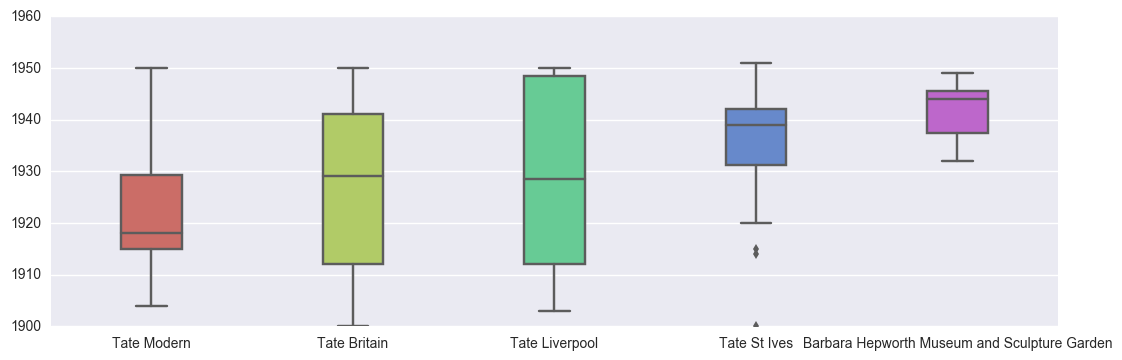

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 4)
m = sns.boxplot(x='galerija ali muzej', y='srednja vrednost let nastajanja', data=umetnine,
                order=('Tate Modern', 'Tate Britain', 'Tate Liverpool', 'Tate St Ives', 'Barbara Hepworth Museum and Sculpture Garden'),
                palette=current_palette_11, ax=ax, width=0.3).set(xlabel='', ylabel='')

Povprečje letnice del po posamezni razstavi:

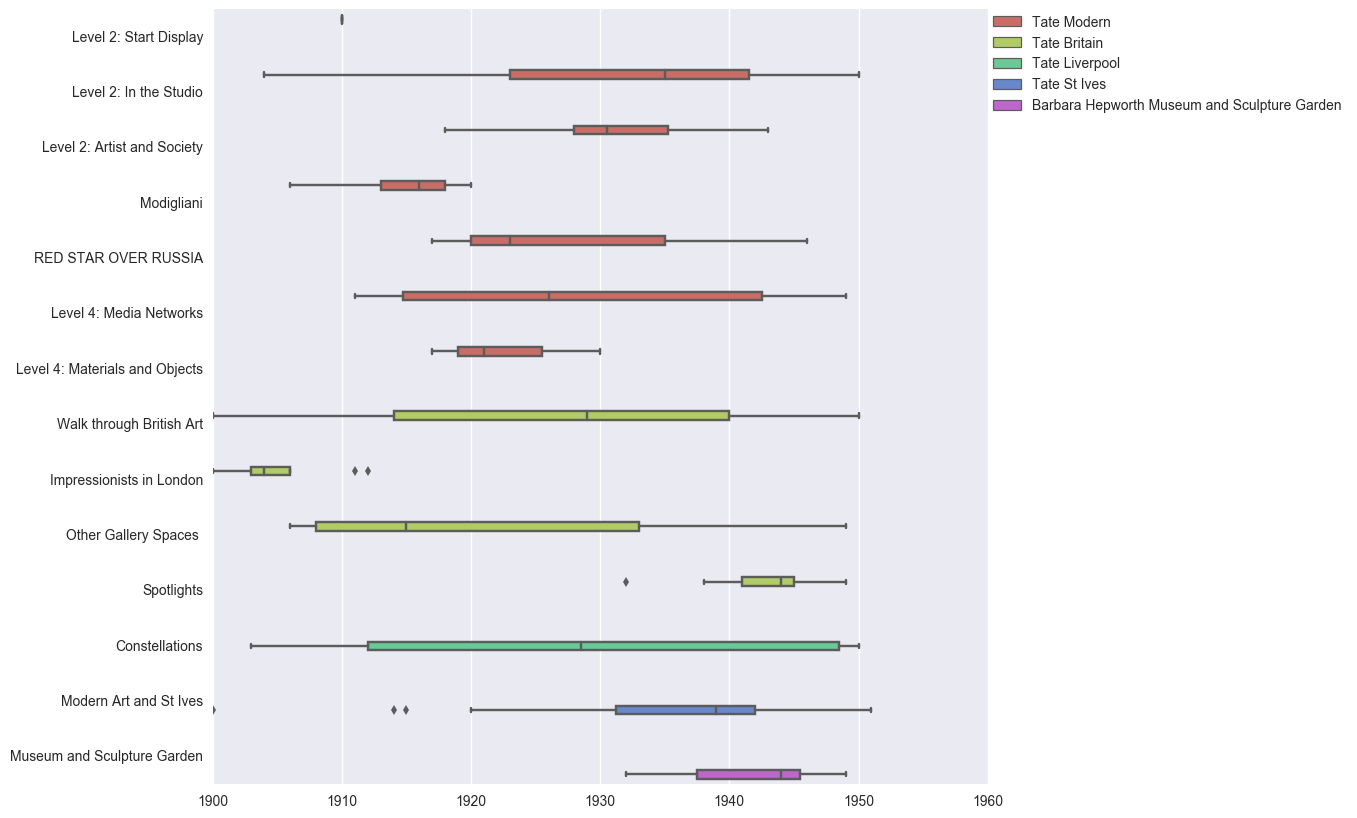

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
m = sns.boxplot(x='srednja vrednost let nastajanja', y='razstava', hue='galerija ali muzej', data=umetnine,
                order=('Level 2: Start Display', 'Level 2: In the Studio', 'Level 2: Artist and Society',
                       'Modigliani', 'RED STAR OVER RUSSIA',
                       'Level 4: Media Networks', 'Level 4: Materials and Objects',
                       'Walk through British Art', 'Impressionists in London', 'Other Gallery Spaces ', 'Spotlights',
                       'Constellations',
                       'Modern Art and St Ives',
                       'Museum and Sculpture Garden'),
                hue_order=('Tate Modern', 'Tate Britain', 'Tate Liverpool', 'Tate St Ives', 'Barbara Hepworth Museum and Sculpture Garden'),
                palette=current_palette_11, ax=ax, width=0.8).set(xlabel='', ylabel='')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)

Iz grafa lahko povzamemo nekaj opazk: Modiglianijeva dela se začnejo z obdobjem, ko se je preselil v Pariz (1906); Britanski umetniki so aktivni v vseh letih obravnavanega obdobja; impresionizem zamre v prvem desetletju dvajsetega stoletja.

In [78]:
umetnine['razstava'].value_counts()

Modigliani                        153
Walk through British Art          132
Level 2: In the Studio             63
Modern Art and St Ives             58
RED STAR OVER RUSSIA               56
Constellations                     32
                                 ... 
Spotlights                         13
Impressionists in London           13
Other Gallery Spaces                9
Museum and Sculpture Garden         7
Level 4: Materials and Objects      3
Level 2: Start Display              1
Name: razstava, dtype: int64

### Amedeo Modigliani, podrobneje

In [79]:
modigliani = umetnine[(umetnine['umetnik'] == 'Amedeo Modigliani')]

In [80]:
modigliani['razstava'].value_counts()

Modigliani    152
Name: razstava, dtype: int64

Vsa dela Modiglianija so razstavljena v njemu posvečeni razstavi. Niso pa vse umetnine v slednji njegove:

In [81]:
razstava_modigliani = umetnine[(umetnine['razstava'] == 'Modigliani')]
razstava_modigliani['umetnik'].value_counts()

Amedeo Modigliani    152
Sir Jacob Epstein      1
Name: umetnik, dtype: int64

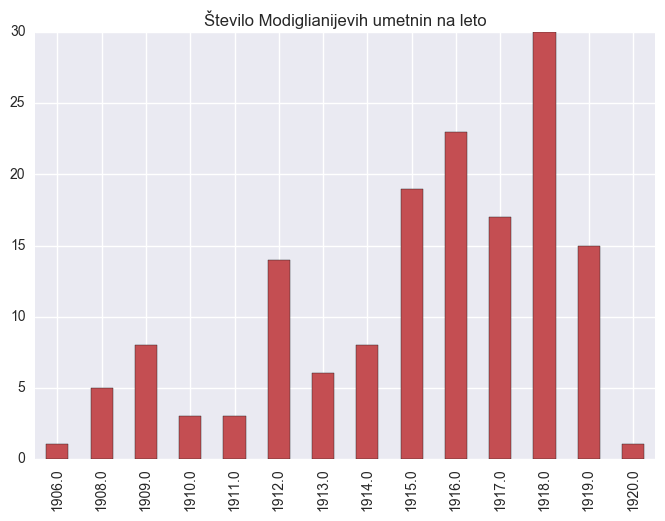

In [82]:
modigliani_po_letnici = modigliani.groupby('srednja vrednost let nastajanja').size()
modigliani_po_letnici.plot(kind='bar', color='r', title='Število Modiglianijevih umetnin na leto').set(xlabel='')

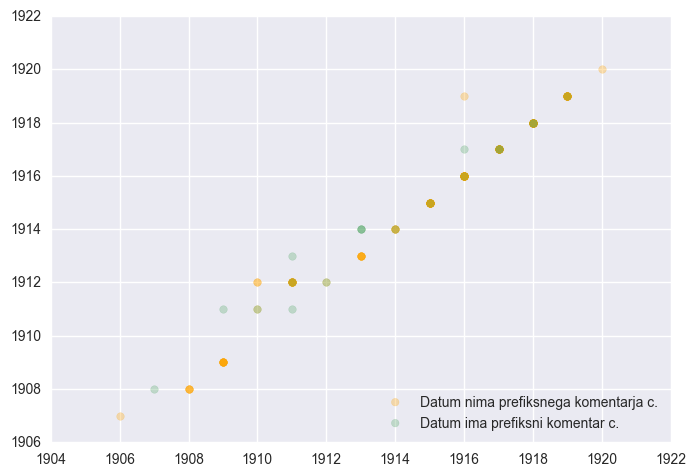

In [83]:
modigliani_c = modigliani[(modigliani['prefiksni komentar letnice'] == 'c.')]
modigliani_ne_c = modigliani[(modigliani['prefiksni komentar letnice'] != 'c.')]

fig, ax = plt.subplots()
plt.scatter(x=modigliani_ne_c['leto začetka nastajanja'], y=modigliani_ne_c['leto zaključka nastajanja'], color= 'orange', s=30, alpha=0.3, label='Datum nima prefiksnega komentarja c.')
plt.scatter(x=modigliani_c['leto začetka nastajanja'], y=modigliani_c['leto zaključka nastajanja'], color= 'g', s=30, alpha=0.3, label='Datum ima prefiksni komentar c.')
ax.legend(loc='lower right')
plt.show()

Po letu 1914 število del, ki nastaja več let upade.

## Matrika popularnosti umetnikov

Umetniki po številu umetnin:

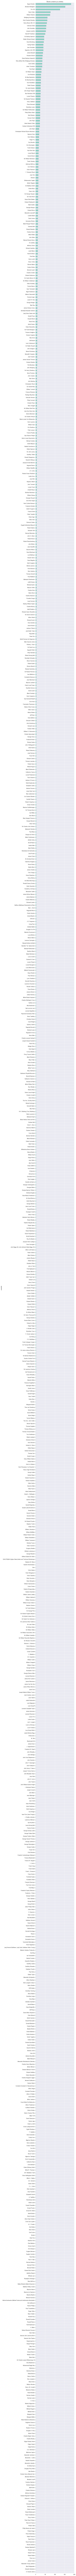

In [84]:
umetnine_po_umetnikih = umetnine.groupby('umetnik')
st_umetnin = umetnine_po_umetnikih.size().count()
graf_umetnikov = umetnine_po_umetnikih.size().sort_values(
    ascending=True).head(st_umetnin)
graf_umetnikov.name = 'umetniki'
graf_umetnikov.sort_values(ascending=True).plot(kind='barh', title = 'Število umetnin po umtniku', figsize=(6,400), cmap='Set3')

Izračunajmo število del na desetletje in nato zastopanost umetnikov na desetletje.

In [85]:
umetnine['desetletje'] = 10 * (umetnine['srednja vrednost let nastajanja'] // 10)
umetnine_po_desetletjih = umetnine.groupby('desetletje')
umetnine_po_desetletjih.size()

desetletje
1900.0     471
1910.0     975
1920.0     887
1930.0    1095
1940.0     971
1950.0     289
1960.0       1
dtype: int64

In [86]:
zastopanost_umetnikov = umetnine\
    .groupby(['desetletje', 'umetnik'])\
    .size()
zastopanost_umetnikov

desetletje  umetnik                
1900.0      Adrian Stokes              2
            Albert Goodwin             4
            Albert Marquet             1
            Albert Rutherston          1
            Alexander Jamieson         1
            Alfred William Rich        1
                                      ..
1950.0      Wilhelmina Barns-Graham    1
            William Gear               1
            William Roberts            3
            William Turnbull           1
            Wolfgang Suschitzky        2
1960.0      Richard Hamilton           1
dtype: int64

Sledi prikaz matrike popularnosti desetih najbolj zastopanih umetnikov (po številu umetnin) v obliki ploščinskega grafa.

C:\Users\matej\Anaconda3\New folder\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


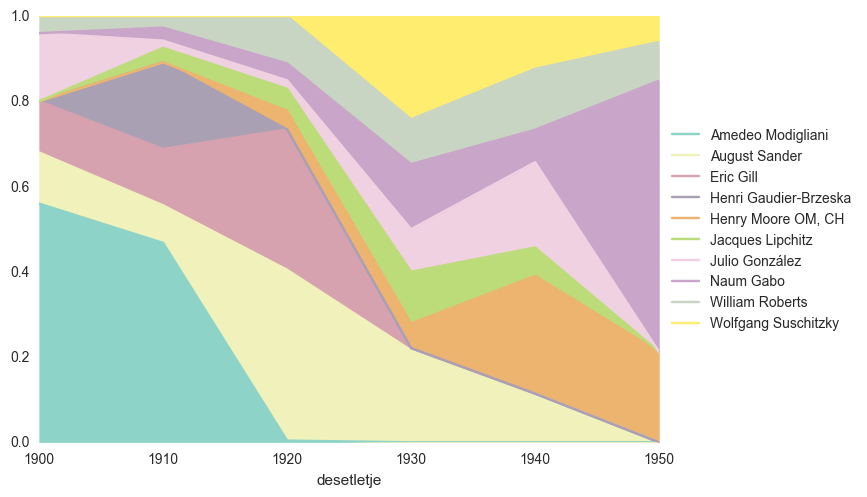

In [87]:
popumetniki = umetnine[(umetnine['umetnik']!='Unknown Artist')]   # Znebimo se 'lažne' vrednosti Unknown Artist
popumetniki = popumetniki.groupby(['umetnik'])
popumetniki = pd.DataFrame(popumetniki.size().sort_values(ascending=False).head(10).reset_index(name = "število umetnin"))
popumetniki = umetnine[(umetnine['umetnik'].isin(popumetniki['umetnik']))]

popumetniki['desetletje'] = 10 * (popumetniki['srednja vrednost let nastajanja'] // 10)
popumetniki_po_desetletjih = popumetniki.groupby('desetletje')
popumetniki_po_desetletjih.size()

zastopanost_umetnikov = popumetniki\
    .groupby(['desetletje', 'umetnik'])\
    .size()
zastopanost_umetnikov

matrika_zastopanosti = zastopanost_umetnikov.unstack()
matrika_popularnosti = matrika_zastopanosti.apply(lambda st: st / st.sum(), axis=1)
matrika_popularnosti.plot(kind='area', colormap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Naivni Bayesov klasifikator

Po zgledu primera naivnega Bayesovega klasifikatorja s predavanj in prilagoditvi kode prof. Matije Pretnarja, preverimo če je mogoče na podlago naslova dela ugotoviti kdo je umetnik.

In [88]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    return pd.Series(list({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

def koreni_umetnin(nizi):
    return nizi[nizi.notnull()].apply(
        koreni_besed
    ).stack().reset_index(level=1, drop=True)

def verjetnosti_po_umetnikih(dogodki_po_umetninah):
    dogodki_po_umetninah.name = 'dogodek'
    dogodki_po_umetnikih = umetnine.join(pd.DataFrame(dogodki_po_umetninah))
    pogostost_dogodkov = pd.crosstab(dogodki_po_umetnikih.dogodek, dogodki_po_umetnikih.umetnik)
    pogostost_dogodkov += (10**(-5))
    return pogostost_dogodkov / pogostost_dogodkov.sum()

Kot bazo podatkov izbiram vsaj eno delo posameznega avtorja (umetnine_osnova) in tri četrtine preostanka podatkov (umetnine_random).
Še ne izbrane podatke preimenujem v tabelo umetnine_testi.

In [89]:
umetnine_osnova = umetnine.drop_duplicates(subset='umetnik')
umetnine_random = umetnine[umetnine['naslov'].isin(umetnine_osnova['naslov']) == False] 
umetnine_random = umetnine.sample(frac=0.75)
umetnine_random = pd.concat([umetnine_osnova, umetnine_random])

umetnine_testi = umetnine[umetnine['naslov'].isin(umetnine_random['naslov']) == False]                    

In [90]:
verjetnost_umetnika = umetnine_random.groupby('umetnik').size() / len(umetnine)
verjetnost_korena_naslova_pri_umetniku = verjetnosti_po_umetnikih(koreni_umetnin(umetnine_random['naslov']))


In [91]:
verjetnost_umetnika.sort_values()

umetnik
James Cowie            0.000212
Eugène Carrière        0.000212
Boris Kustodiev        0.000212
Robert Frank           0.000212
Ernst Van Leyden       0.000212
Raoul Hausmann         0.000212
                         ...   
Wolfgang Suschitzky    0.011262
William Roberts        0.011687
Naum Gabo              0.012112
Eric Gill              0.020399
Amedeo Modigliani      0.025074
August Sander          0.029749
dtype: float64

In [92]:
verjetnost_korena_naslova_pri_umetniku['Dame Barbara Hepworth'].sort_values(ascending=False).head(10)

dogodek
th          0.074740
for         0.056055
sculptur    0.056055
waterl      0.046712
bridg       0.046712
project     0.046712
with        0.046712
form        0.046712
hill        0.037370
an          0.028027
Name: Dame Barbara Hepworth, dtype: float64

In [93]:
def doloci_umetnika_iz_naslova(naslov=''):
    faktorji_umetnikov = 1 * verjetnost_umetnika
    faktorji_umetnikov *= verjetnost_korena_naslova_pri_umetniku[
            verjetnost_korena_naslova_pri_umetniku.index.isin(
                koreni_besed(naslov)
            )
        ].prod()
    faktorji_umetnikov /= max(faktorji_umetnikov)
    return faktorji_umetnikov.sort_values(ascending=False).head(5)

Zadeva ne deluje najbolje: pravilni zadetki so redki. Pojavljajo se tudi primeri, ko je naslov sestavljen iz samih besed, ki ne pozna, zakar vrne NaN.
Spodaj je naključno generiran primer.

In [130]:
test = umetnine_testi.sample()
test

,umetnik,naslov,prefiksni komentar letnice,leto začetka nastajanja,leto zaključka nastajanja,dodatni komentar ob letnici,srednja vrednost let nastajanja,galerija ali muzej,razstava,desetletje
id,,,,,,,,,,
X63457,Amedeo Modigliani,Madam Pompadour,NaN,1915.0,1915.0,NaN,1915.0,Tate Modern,Modigliani,1910.0


In [131]:
test = test['naslov']
doloci_umetnika_iz_naslova(naslov=test.max())

umetnik
Augustus John OM     1.000000
Amedeo Modigliani    0.717915
André Derain         0.674876
Stephen Gilbert      0.000026
John Tunnard         0.000026
dtype: float64

Sledeči testi z raznolikimi rezultati so priložnostno izbrani. V primeru ko ste kodo na novo pognali obstaja verjetnost, da ne bodo delovali. (Tabela umetnine_testi je ustvarjena na podlagi tabele umetnine_random, ki je kot ime svetuje priložnostno naključna.)

In [138]:
test2 = umetnine_testi[(umetnine_testi['naslov']=='Portrait of Mrs Leopold Hirsch')] 
test2                           
                                            # nekaj testov: Figure of Terror II; Men Shall Know Nothing of This; Madam Pompadour

,umetnik,naslov,prefiksni komentar letnice,leto začetka nastajanja,leto zaključka nastajanja,dodatni komentar ob letnici,srednja vrednost let nastajanja,galerija ali muzej,razstava,desetletje
id,,,,,,,,,,
L01713,John Singer Sargent,Portrait of Mrs Leopold Hirsch,NaN,1902.0,1902.0,NaN,1902.0,NaN,NaN,1900.0


In [139]:
test2 = test2['naslov'] 
doloci_umetnika_iz_naslova(naslov=test2.max())

umetnik
John Singer Sargent    1.000000
Amedeo Modigliani      0.564296
Dame Ethel Walker      0.509496
Sir Jacob Epstein      0.290075
Wyndham Lewis          0.245594
dtype: float64

In [140]:
test3 = umetnine_testi[(umetnine_testi['naslov']=='Peat Bog, Scotland')]
test3

,umetnik,naslov,prefiksni komentar letnice,leto začetka nastajanja,leto zaključka nastajanja,dodatni komentar ob letnici,srednja vrednost let nastajanja,galerija ali muzej,razstava,desetletje
id,,,,,,,,,,
T05057,Sir Frank Short,"Peat Bog, Scotland",c.,1936.0,1936.0,NaN,1936.0,View by appointment,NaN,1930.0


In [141]:
test3 = test3['naslov']
doloci_umetnika_iz_naslova(naslov=test3.max())

umetnik
A. Gosset James    NaN
A. Neville Lewis   NaN
A. Teplitsky       NaN
A. V. Ferster      NaN
A.H. Gerrard       NaN
dtype: float64